E0= -36.511703572509575   E1= -36.51170162998102   E2= -36.511701629980955
Emca(meV)= 0.052859310822060475
Emin= -0.0953824639999965   Emax= 0.0760572128000021
xmin= -0.5889   xmax= 0.5889


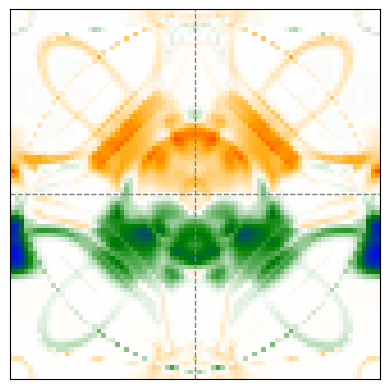

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'cm'

# Read .xy file
def read_data(file_path, x_column, y_column, E_column):
    x_values = []
    y_values = []
    E_values = []
    with open(file_path, 'r') as file:
        next(file) 
        for line in file:
            data = line.strip().split()
            if len(data) >= max(x_column, y_column, E_column):
                x_values.append(float(data[x_column - 1]))
                y_values.append(float(data[y_column - 1]))
                E_values.append(float(data[E_column - 1]))
    return x_values, y_values, E_values

def get_esum(x,y,E0,E1,E2):
    E0_ave=0.
    E1_ave=0.
    E2_ave=0.
    n=0
    x_max=max(x)
    y_max=max(y)
    for i in range(len(x)):
        if x[i] < x_max:
            if y[i] < y_max:
                E0_ave=E0_ave+E0[i]
                E1_ave=E1_ave+E1[i]
                E2_ave=E2_ave+E2[i]
                n=n+1
    E0_ave=E0_ave/n
    E1_ave=E1_ave/n
    E2_ave=E2_ave/n
    return E0_ave,E1_ave,E2_ave
    
if __name__ == '__main__':
    home = "./anisFermi_OOOOO/"
    #home = "./anisFermi_NOOOO/"
    #home = "./anisFermi_ANOOOO/"
    #home = "./anisFermi_FOOOO/"
    #home = "./anisFermi_LFOOOO/"
    #dir = "./E-008/"
    #dir = "./E-004/"
    dir = "./E-000/"
    #dir = "./E+004/"
    #dir = "./E+008/"
    file1_path = home + dir + 'kdis_n1.xy90'     # inplane
    file2_path = home + dir + 'kdis_n1.xy90180'  # inplane
    file0_path = home + dir + 'kdis_n1.xy00'     # outplane
    x_column = 1  # x values
    y_column = 2  # y values
    E_column = 6  # E values
    
    x1_data, y1_data, E1_data = read_data(file1_path, x_column, y_column, E_column)
    x2_data, y2_data, E2_data = read_data(file2_path, x_column, y_column, E_column)
    x0_data, y0_data, E0_data = read_data(file0_path, x_column, y_column, E_column)
    x_plot = x0_data
    y_plot = y0_data

    E0_ave, E1_ave, E2_ave = get_esum(x0_data,y0_data,E0_data,E1_data,E2_data)
    print("E0=",E0_ave,"  E1=",E1_ave,"  E2=",E2_ave)
    print("Emca(meV)=",((E1_ave+E2_ave)*0.5-E0_ave)*27211.6)

    # Z-axis
    E1_plot = [(E1 - E0) for E1, E0 in zip(E1_data, E0_data)] 
    E2_plot = [(E2 - E0) for E2, E0 in zip(E2_data, E0_data)] 
    ES_plot = [((E1 + E2) * 0.5) for E1, E2 in zip(E1_plot, E2_plot)]
    EA_plot = [(E1 - ES) for E1, ES in zip(E1_plot, ES_plot)]
    
    E_plot = E1_plot
    #E_plot = E2_plot
    #E_plot = ES_plot
    #E_plot = EA_plot

    #set axis
    E_min = -0.1
    E_max =  0.1
    x_min = min(x_plot)
    x_max = max(x_plot)
    y_min = min(y_plot)
    y_max = max(y_plot)
    x_num = 81
    y_num = 81

    #print axis
    print("Emin=",min(E_plot),"  Emax=",max(E_plot))
    print("xmin=",min(x_plot),"  xmax=",max(x_plot))

    # Create a meshgrid for plotting
    x = np.linspace(x_min, x_max, num=x_num)
    y = np.linspace(y_min, y_max, num=y_num)
    X, Y = np.meshgrid(x, y)

    # Interpolate E_data to match the size of X and Y
    points = np.column_stack((x_plot, y_plot))
    E = griddata(points, E_plot, (X, Y), method='nearest')
    
    # Create a color map plot
    colors = ['blue', 'green', 'white', 'orange', 'red']
    cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom', colors)
    plt.imshow(E, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap=cmap_custom, vmin=E_min, vmax=E_max)
    #plt.colorbar()
    
    # Set axis
    plt.xticks([])   #plt.xticks(np.arange(-0.5, 0.6, 0.1))
    plt.yticks([])   #plt.yticks(np.arange(-0.5, 0.6, 0.1))
    #plt.xlabel(r'kx ', fontname='Times New Roman', fontsize=14)
    #plt.ylabel(r'ky ', fontname='Times New Roman', fontsize=14)

    # Set lines
    plt.axhline(0, color='gray', linestyle='--', linewidth=1.0) 
    plt.axvline(0, color='gray', linestyle='--', linewidth=1.0)

    # save/draw figure
    plt.savefig('fig.svg',bbox_inches="tight",transparent=True)
    plt.show()
    plt.clf()
    plt.close()

